## 1. Preprocess energy soruce data

In [10]:
import pandas as pd

# Load & keep the same format as the other notebooks (Total, EU 27, etc.)
df = pd.read_csv('data/primary-energy-source.csv')
df = df[df['Year'] == 2023]
df = df.drop(columns=['Year', 'Code'])
df.columns = ['Entity', 'Coal', 'Oil', 'Gas', 'Nuclear', 'Hydro', 'Wind', 'Solar', 'Other renewables']
df['Total'] = df.iloc[:, 1:].sum(axis=1)
df['Entity'] = df['Entity'].replace('European Union (27)', 'EU 27')
# df.nlargest(30, 'Total') # Used to set `GLOBAL`
GLOBAL = ['World', 'China', 'United States', 'EU 27', 'India', 'Russia']
EU_COUNTRIES = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark",
                "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland",
                "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland",
                "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden", "EU 27"] # Remember that Malta is missing

## 2. Print (copy-paste -> .js) to avoid a server request

In [11]:
df_eu = df[df['Entity'].isin(EU_COUNTRIES)].round(1).sort_values(by='Total', ascending=False)
df_eu = df_eu.fillna(0)

output_eu = 'const euData = [\n'
for index, row in df_eu.iterrows():
    output_eu += f"    {{'Country': '{row['Entity']}', 'Coal': {row['Coal']}, 'Oil': {row['Oil']}, 'Gas': {row['Gas']}, 'Nuclear': {row['Nuclear']}, 'Hydro': {row['Hydro']}, 'Wind': {row['Wind']}, 'Solar': {row['Solar']}, 'Other renewables': {row['Other renewables']}, 'Total': {row['Total']} }},\n"
output_eu += '];\n'
print(output_eu)

const euData = [
    {'Country': 'EU 27', 'Coal': 1523.2, 'Oil': 5957.2, 'Gas': 3194.6, 'Nuclear': 1544.1, 'Hydro': 846.0, 'Wind': 1248.1, 'Solar': 642.1, 'Other renewables': 501.2, 'Total': 15456.4 },
    {'Country': 'Germany', 'Coal': 507.2, 'Oil': 1114.5, 'Gas': 756.6, 'Nuclear': 18.0, 'Hydro': 51.0, 'Wind': 369.1, 'Solar': 159.0, 'Other renewables': 157.8, 'Total': 3133.4 },
    {'Country': 'France', 'Coal': 49.4, 'Oil': 767.9, 'Gas': 338.6, 'Nuclear': 843.0, 'Hydro': 144.2, 'Wind': 135.9, 'Solar': 57.8, 'Other renewables': 31.0, 'Total': 2367.8 },
    {'Country': 'Italy', 'Coal': 60.2, 'Oil': 686.9, 'Gas': 586.0, 'Nuclear': 0.0, 'Hydro': 101.1, 'Wind': 61.1, 'Solar': 81.1, 'Other renewables': 60.8, 'Total': 1637.2 },
    {'Country': 'Spain', 'Coal': 32.9, 'Oil': 713.4, 'Gas': 293.0, 'Nuclear': 141.6, 'Hydro': 66.2, 'Wind': 166.8, 'Solar': 121.7, 'Other renewables': 17.3, 'Total': 1552.9 },
    {'Country': 'Poland', 'Coal': 418.3, 'Oil': 390.3, 'Gas': 195.8, 'Nuclear': 0.0, 'Hydro'

In [12]:
df_global = df[df['Entity'].isin(GLOBAL)].round(1).sort_values(by='Total', ascending=False)

output_global = 'const globalData = [\n'
for index, row in df_global.iterrows():
    output_global += f"    {{'Country': '{row['Entity']}', 'Coal': {row['Coal']}, 'Oil': {row['Oil']}, 'Gas': {row['Gas']}, 'Nuclear': {row['Nuclear']}, 'Hydro': {row['Hydro']}, 'Wind': {row['Wind']}, 'Solar': {row['Solar']}, 'Other renewables': {row['Other renewables']}, 'Total': {row['Total']} }},\n"
output_global += '];\n'
print(output_global)

const globalData = [
    {'Country': 'World', 'Coal': 45564.9, 'Oil': 54564.0, 'Gas': 40101.7, 'Nuclear': 6824.2, 'Hydro': 11014.1, 'Wind': 6040.4, 'Solar': 4264.3, 'Other renewables': 2427.9, 'Total': 170801.4 },
    {'Country': 'China', 'Coal': 25538.5, 'Oil': 9090.5, 'Gas': 4048.4, 'Nuclear': 1083.6, 'Hydro': 3184.7, 'Wind': 2301.2, 'Solar': 1517.4, 'Other renewables': 632.4, 'Total': 47396.7 },
    {'Country': 'United States', 'Coal': 2276.9, 'Oil': 9960.7, 'Gas': 8864.7, 'Nuclear': 2034.4, 'Hydro': 613.9, 'Wind': 1115.8, 'Solar': 624.8, 'Other renewables': 202.7, 'Total': 25693.8 },
    {'Country': 'EU 27', 'Coal': 1523.2, 'Oil': 5957.2, 'Gas': 3194.6, 'Nuclear': 1544.1, 'Hydro': 846.0, 'Wind': 1248.1, 'Solar': 642.1, 'Other renewables': 501.2, 'Total': 15456.4 },
    {'Country': 'India', 'Coal': 6105.9, 'Oil': 2937.0, 'Gas': 626.1, 'Nuclear': 120.2, 'Hydro': 387.5, 'Wind': 213.3, 'Solar': 294.6, 'Other renewables': 119.0, 'Total': 10803.5 },
    {'Country': 'Russia', 'Coal': 1065

## 3. Plot just to get an idea

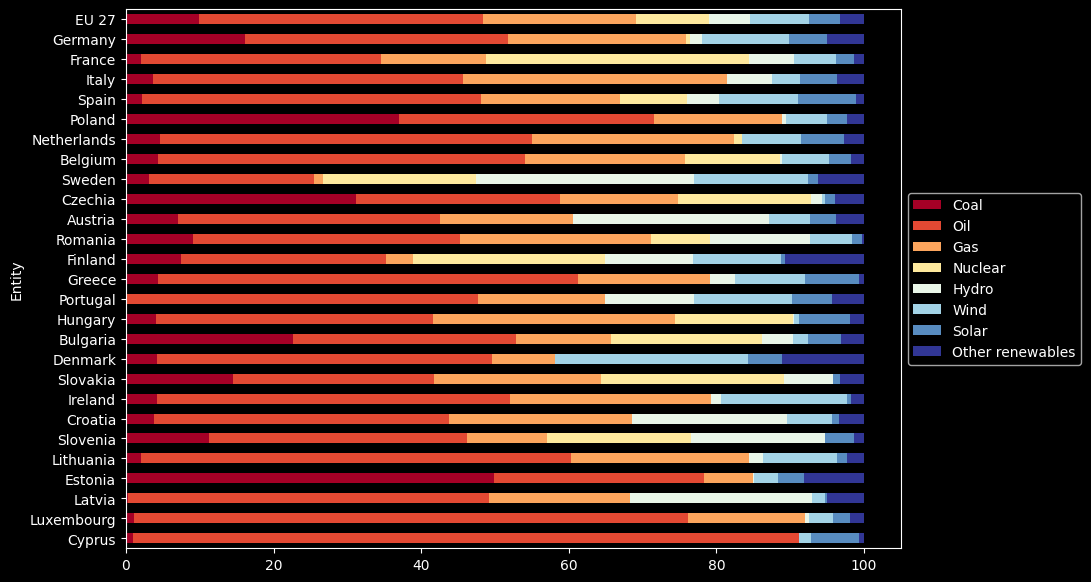

In [ ]:
import matplotlib.pyplot as plt

df_eu = df_eu.drop(columns=['Total'])
df_eu.set_index('Entity', inplace=True)
df_eu_percent = df_eu.div(df_eu.sum(axis=1), axis=0) * 100
ax = df_eu_percent.plot(kind='barh', stacked=True, figsize=(10, 7), colormap='RdYlBu')
plt.style.use('dark_background')
plt.gca().invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()